### Imports

In [162]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from fonctions_tp1_approximation import *
from utils_tp1_approximation import * 

from mpl_toolkits.mplot3d import Axes3D

In [164]:
## Nombre de temps à évaluer pour construire les courbes approximantes
nb_echantillon = 50
## Temps d'avaluation asscoié à chaque échantillon
list_t = echantillonnage(nb_ech = nb_echantillon)
print(list_t)

[0.0, 0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.1020408163265306, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.18367346938775508, 0.2040816326530612, 0.22448979591836732, 0.24489795918367346, 0.26530612244897955, 0.2857142857142857, 0.3061224489795918, 0.32653061224489793, 0.3469387755102041, 0.36734693877551017, 0.3877551020408163, 0.4081632653061224, 0.42857142857142855, 0.44897959183673464, 0.4693877551020408, 0.4897959183673469, 0.5102040816326531, 0.5306122448979591, 0.5510204081632653, 0.5714285714285714, 0.5918367346938775, 0.6122448979591836, 0.6326530612244897, 0.6530612244897959, 0.673469387755102, 0.6938775510204082, 0.7142857142857142, 0.7346938775510203, 0.7551020408163265, 0.7755102040816326, 0.7959183673469387, 0.8163265306122448, 0.836734693877551, 0.8571428571428571, 0.8775510204081632, 0.8979591836734693, 0.9183673469387754, 0.9387755102040816, 0.9591836734693877, 0.9795918367346939, 1.0]


## Polynômes de Bernstein

[0.0, 0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.1020408163265306, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.18367346938775508, 0.2040816326530612, 0.22448979591836732, 0.24489795918367346, 0.26530612244897955, 0.2857142857142857, 0.3061224489795918, 0.32653061224489793, 0.3469387755102041, 0.36734693877551017, 0.3877551020408163, 0.4081632653061224, 0.42857142857142855, 0.44897959183673464, 0.4693877551020408, 0.4897959183673469, 0.5102040816326531, 0.5306122448979591, 0.5510204081632653, 0.5714285714285714, 0.5918367346938775, 0.6122448979591836, 0.6326530612244897, 0.6530612244897959, 0.673469387755102, 0.6938775510204082, 0.7142857142857142, 0.7346938775510203, 0.7551020408163265, 0.7755102040816326, 0.7959183673469387, 0.8163265306122448, 0.836734693877551, 0.8571428571428571, 0.8775510204081632, 0.8979591836734693, 0.9183673469387754, 0.9387755102040816, 0.9591836734693877, 0.9795918367346939, 1.0]
[array([[0.    

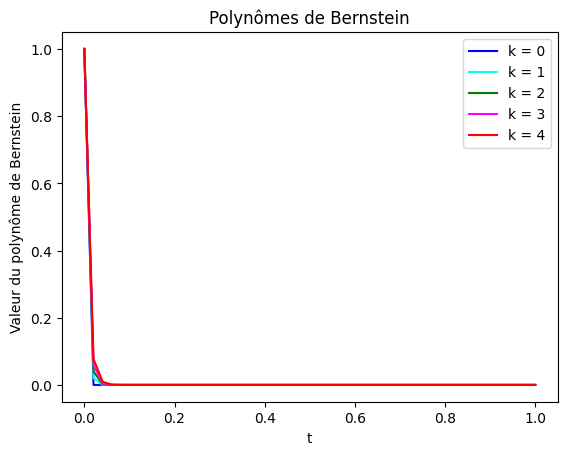

In [165]:
degre_max = 5

# Base des polynomes de Bernstein
base = build_polys_bernstein(degre_max, list_t)

## Affichage
for i in range(len(base)):
    courbe_i = base[i]
    plt.plot(courbe_i[:,0], courbe_i[:,1], color=liste_couleurs[i % len(liste_couleurs)], label=f'k = {i}')

plt.legend()
plt.xlabel('t')
plt.ylabel('Valeur du polynôme de Bernstein')
plt.title('Polynômes de Bernstein')
plt.show()

## DeCasteljau Evaluation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


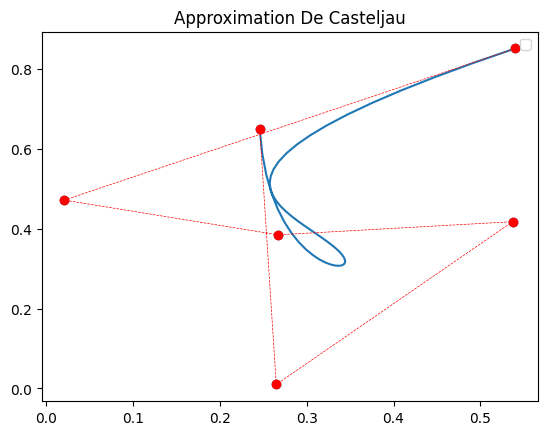

In [166]:
## Points de contrôle initiaux 
nb_pts_controle = 6
X_pts_controles,Y_pts_controles = generate_points(nb_pts_controle)

liste_points = []
for tt in list_t:
    # Approximation des abscisses
    x = DeCasteljau(X_pts_controles, tt)
    # Approximation des ordonnées
    y = DeCasteljau(Y_pts_controles, tt)
    liste_points.append([x,y])

points = np.array(liste_points)
plt.plot(points[:,0], points[:,1])
plt.plot(X_pts_controles, Y_pts_controles, color='red', marker='o', linestyle='--', linewidth=0.5)  
plt.scatter(X_pts_controles, Y_pts_controles)
plt.legend()
plt.title('Approximation De Casteljau')
plt.show()

## DeCasteljau Subdivision
Une étape de subdivision : {Pi} --> {Qj} et {Rk}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


left_points = [(0.065, 0.97), (0.646, 0.739)]
right_points = [(0.185, 0.565), (0.487, 0.366)]


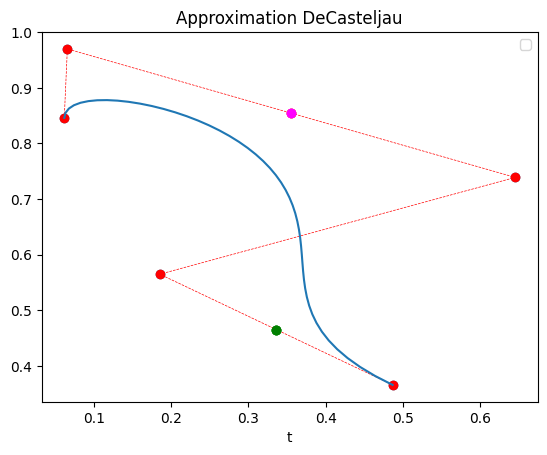

In [167]:
## Points  de contrôle initiaux 
nb_pts_controle = 5
X_pts_controles,Y_pts_controles = generate_points(nb_pts_controle)

## Subdivision
QX, QY, RX, RY = subdivision(X_pts_controles, Y_pts_controles)
points = np.array(liste_points)

## Courbe 
liste_points = []
for tt in list_t:
    x = DeCasteljau(X_pts_controles, tt); 
    y = DeCasteljau(Y_pts_controles, tt)
    liste_points.append([x,y])
points_sub = np.array(liste_points)

## Points de controle initiaux
plt.plot(X_pts_controles, Y_pts_controles, color='red', marker='o', linestyle='--', linewidth=0.5) 
plt.scatter(X_pts_controles, Y_pts_controles)
## Points de controle de gauche sur [0,1/2]
plt.plot(QX, QY, color='magenta', marker='o', linestyle='--', linewidth=0.5) 
plt.scatter(QX, QY)
## Points de controle de droite sur [1/2,1]
plt.plot(RX, RY, color='green', marker='o', linestyle='--', linewidth=0.5) 
plt.scatter(RX, RY)
## Courbes 
plt.plot(points_sub[:,0], points_sub[:,1])
plt.legend()
plt.xlabel('t')
plt.title('Approximation DeCasteljau')
plt.show()


Appel récursif pour réaliser n subdivision

In [168]:
## Points  de contrôle initiaux 
nb_pts_controle = 5
X_pts_controles,Y_pts_controles = generate_points(nb_pts_controle)
nb_subdivision = 10


(X_subdivision, Ysubdivision) = DeCasteljauSub(X_pts_controles, Y_pts_controles, nb_subdivision)
arr_points = np.zeros((len(X_subdivision),2))

for i in range(len(X_subdivision)):
    arr_points[i,:] = [X_subdivision[i], Ysubdivision[i]]

plt.plot(arr_points[:,0], arr_points[:,1])
plt.plot(X_pts_controles, Y_pts_controles, color='red', marker='o', linestyle='--', linewidth=0.5) 
plt.scatter(X_pts_controles, Y_pts_controles)
plt.legend()
plt.xlabel('t')
plt.title('Approximation DeCasteljau Subdivision')
plt.show()


subdiv(X=[0.766, 0.107, 0.386, 0.488, 0.161], Y=[0.788, 0.995, 0.616, 0.291, 0.602], nombreDeSubdivision=10)
left_points = [(0.107, 0.995), (0.386, 0.616)]
right_points = [(0.488, 0.291), (0.161, 0.602)]
subdiv(X=[0.2465, 0.2465, 0.3245, 0.3245], Y=[0.8055, 0.8055, 0.4465, 0.4465], nombreDeSubdivision=9)
left_points = [(0.2465, 0.8055), (0.3245, 0.4465)]
right_points = [(0.3245, 0.4465)]


IndexError: list index out of range

## Surface de Bezier en produit tensoriel

(5, 5, 3)


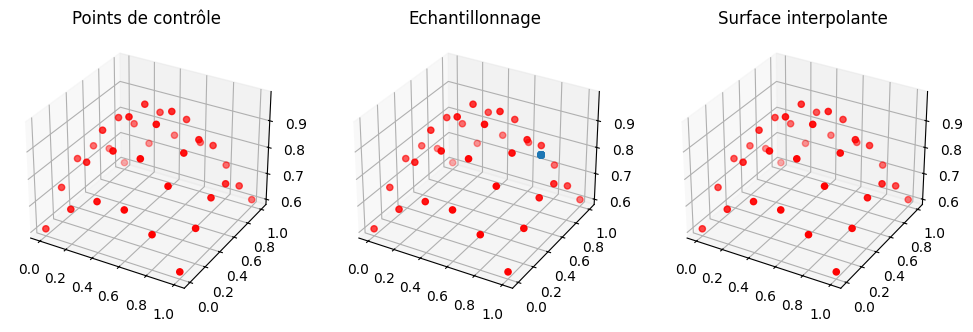

In [ ]:
# Générer une grille de points de contrôle régulière
nb_point_grille = 6
X, Y = np.meshgrid(np.linspace(0, 1, nb_point_grille), np.linspace(0, 1, nb_point_grille))
Z = np.exp(-((X-0.5)**2  + (Y-0.5)**2))


# Paramétrisation 
nb_echantillon_surface = 10
cc = echantillonnage(nb_ech = nb_echantillon)

# Interpoler la surface
approx_surface = approximation_surface(X, Y, Z, list_t, nb_point_grille)

print(approx_surface.shape)
# Visualisation
show_surface(X, Y, Z, approx_surface)